<a href="https://colab.research.google.com/github/NextGen-AI-Camp/curriculum/blob/main/Week%234/NN%233/NextGen_AI_Camp_Neural_Network3_Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

Code ต่อไปนี้จะสร้างข้อมูลในรูปแบบ Spiral โดยข้อมูลจะมีจำนวน 300 ตำแหน่ง แบ่งออกเป็น 3 Class ข้อมูลจะอยู่ใน X และ Label จะอยู่ใน y จากนั้นจะนำไปสร้างเป็น Dataset และแบ่งเป็น train_dataset, val_dataset และ นำไปสร้างเป็น DataLoader อีกต่อหนึ่งเป็น train_loader และ val_loader

ใน Notebook จะมี function plot_decision_boundary ซึ่งต้องการ Parameter 3 ตัว คือ model, X และ y เพื่อแสดงขอบเขตของแต่ละคลาส

ให้ทำตาม TODO ให้ครบ

ให้ส่งเป็นไฟล์ .ipynb โดยตั้งชื่อไฟล์ขึ้นต้นเป็นเลขของค่าย 3 หลัก ภายในไฟล์ให้ใส่ E-Mail ด้วย เผื่อมีความผิดพลาด  

## สร้าง Data

(-1.5, 1.5)

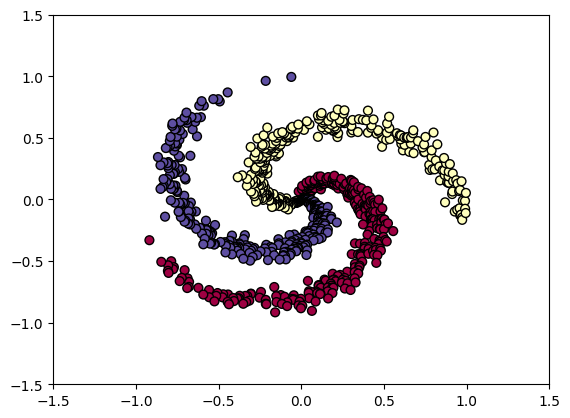

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
N = 300 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])


In [ ]:
X[::20]


array([[ 0.        ,  0.        ],
       [-0.01609725,  0.06492381],
       [ 0.04276842,  0.12675864],
       [ 0.12432665,  0.15751473],
       [ 0.19873554,  0.17914171],
       [ 0.33100449, -0.04787062],
       [ 0.39891919, -0.04399433],
       [ 0.46822393, -0.00180822],
       [ 0.47707755, -0.24237838],
       [ 0.43367969, -0.41753321],
       [ 0.34381402, -0.57377191],
       [ 0.27949082, -0.68063636],
       [ 0.04683176, -0.80130823],
       [-0.08585673, -0.86531629],
       [-0.51485805, -0.78222048],
       [-0.        , -0.        ],
       [-0.05562774, -0.03714535],
       [-0.1336905 ,  0.00487249],
       [-0.19538557,  0.04574371],
       [-0.2675141 ,  0.00487571],
       [-0.29259155,  0.16200542],
       [-0.18956414,  0.35374773],
       [-0.22007955,  0.41328188],
       [-0.13042974,  0.51897818],
       [ 0.16586028,  0.57870754],
       [ 0.30230551,  0.59668557],
       [ 0.42478078,  0.6007847 ],
       [ 0.66221228,  0.45361106],
       [ 0.8692592 ,

In [ ]:
y[::20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=uint8)

## สร้าง dataset

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

class SpiralDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [ ]:
dataset = SpiralDataset(X, y)

## แบ่ง data และสร้าง DataLoader

In [ ]:
# คำนวณขนาดของ train และ validation set
total_size = len(dataset)
train_size = int(0.9 * total_size)
val_size = total_size - train_size

# แบ่ง dataset
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [ ]:
# สร้าง DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

print(f"Number of batches in train loader: {len(train_loader)}")
print(f"Number of batches in validation loader: {len(val_loader)}")

Number of batches in train loader: 26
Number of batches in validation loader: 3


In [ ]:
# ดึงข้อมูล 1 batch โดยใช้ next(iter())
batch_X, batch_y = next(iter(train_loader))

print("Shape of X [N, C]:", batch_X.shape)
print("Shape of y:", batch_y.shape)
print("X:", batch_X)
print("y:", batch_y)

Shape of X [N, C]: torch.Size([32, 2])
Shape of y: torch.Size([32])
X: tensor([[ 0.4593, -0.2331],
        [-0.6684, -0.0252],
        [-0.6445, -0.2027],
        [-0.3868, -0.8049],
        [ 0.1298, -0.0694],
        [-0.8040,  0.3039],
        [-0.1355,  0.3742],
        [ 0.1376, -0.1683],
        [ 0.3243, -0.5230],
        [-0.2724,  0.0534],
        [ 0.4880,  0.4275],
        [ 0.4514, -0.4083],
        [ 0.6752,  0.5372],
        [-0.3370, -0.3717],
        [-0.1240, -0.7761],
        [-0.1313, -0.4877],
        [ 0.1147, -0.1886],
        [ 0.0656, -0.7530],
        [ 0.2623, -0.6371],
        [ 0.3184,  0.1400],
        [ 0.4026,  0.5425],
        [-0.3845,  0.1804],
        [ 0.9727, -0.1653],
        [-0.7644,  0.2219],
        [ 0.5078, -0.3295],
        [-0.5511, -0.2584],
        [-0.1518, -0.7848],
        [-0.2673, -0.4520],
        [-0.6420,  0.6303],
        [ 0.1218, -0.2382],
        [ 0.3504, -0.5500],
        [ 0.0015,  0.0234]])
y: tensor([0, 2, 2, 0, 2, 2, 1, 

In [ ]:
## TODO : สร้าง Neural Network Model



In [ ]:
# TODO : สร้าง def train_model สำหรับทำ training loop โดยเก็บพารามิเตอร์ ใน training_logs
#
# training_logs = {"train_loss": [], "train_acc": [], "validate_loss": [], "validate_acc": []}
# ให้ return model, training_logs



In [ ]:
def plot_graph(history):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(10)
    fig.suptitle("Train vs Validation")
    ax1.plot(history["train_acc"], label="Train")
    ax1.plot(history["validate_acc"], label="Validation")
    ax1.legend()
    ax1.set_title("Accuracy")

    ax2.plot(history["train_loss"], label="Train")
    ax2.plot(history["validate_loss"], label="Validation")
    ax2.legend()
    ax2.set_title("Loss")
    plt.show()

In [ ]:
def plot_decision_boundary(network, features, labels):
  # Plot the decision boundary
  # Determine grid range in x and y directions
  x_min, x_max = features[:, 0].min()-1, features[:, 0].max()+1
  y_min, y_max = features[:, 1].min()-1, features[:, 1].max()+1

  # Set grid spacing parameter
  spacing = min(x_max - x_min, y_max - y_min) / 250

  # Create grid
  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
               np.arange(y_min, y_max, spacing))

  # Concatenate data to match input
  data = np.hstack((XX.ravel().reshape(-1,1),
                  YY.ravel().reshape(-1,1)))

  # Pass data to predict method
  data_t = torch.tensor(data, dtype=torch.float).to(device)
  #Set model to evaluation mode
  model.eval()
  Z = model(data_t)

  #Convert PyTorch tensor to NumPy for plotting.
  Z = np.argmax(Z.detach().cpu().numpy(), axis=1)
  Z = Z.reshape(XX.shape)
  fig = plt.figure()
  plt.contourf(XX, YY, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(features[:, 0], features[:, 1], edgecolors='k', c=labels, s=40, cmap=plt.cm.Spectral)
  plt.xlim(XX.min(), XX.max())
  plt.ylim(YY.min(), YY.max())
  #fig.savefig('spiral_linear.png')
  plt.show()

In [33]:
# TODO : ทำตามขั้นตอนดังนี้
# 1. ตรวจสอบว่ามี GPU ให้รันใน GPU
# 2. ทำ manual_seed
# 3. สร้าง model
# 4. กำหนด Loss Function และ Optimization Function
# 5. เรียก ฟังก์ชัน training loop



In [ ]:
# แสดง Loss และ Accuracy

plot_graph(training_logs)

## Plot boundary จะได้รูปคล้ายกับแบบนี้

<img src="https://raw.githubusercontent.com/khthana/AI_resource/main/spiral_boundary.png">

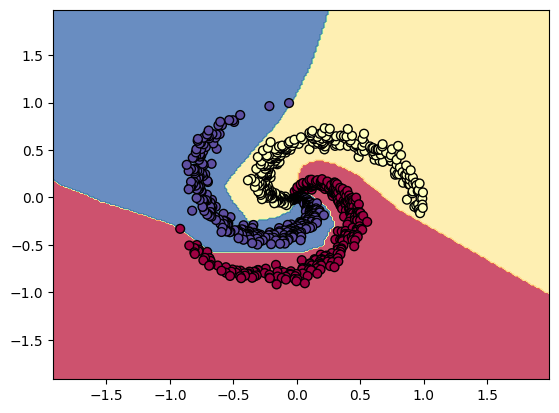

In [ ]:
plot_decision_boundary(model, X, y)